In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass as ec
import tools
import math_functions as mf
import BodeClass_PSI as bc_PSI
import DREAM_colors as dc


In [2]:
importlib.reload(ec)
importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc_PSI)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

In [3]:
folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Apresentaçoes/20230926_IBPC_ENS_Ladi/"

ECS = pd.read_csv(folder + "bode_ECS_data.csv")
PSI = pd.read_csv(folder + "bode_PSI_data.csv")

In [4]:
ECS

,Frequency,Amplitude,std_amp,Phases,std_phase
0,0.007812,0.323299,0.118231,-1.733619,91.674101
1,0.015625,0.265288,0.089855,-101.946055,36.536619
2,0.031250,0.156152,0.045129,-14.305301,63.402550
3,0.062500,0.331306,0.066700,-18.066125,16.374549
4,0.125000,0.466897,0.066877,-72.482461,3.411481
5,0.250000,0.493901,0.164668,-43.571732,2.901486
6,0.500000,0.515028,0.048586,-3.387122,2.168917
7,1.000000,0.502089,0.093468,-8.727247,0.319905
8,2.000000,0.520721,0.037462,-110.568919,1.865916
9,4.000000,0.279503,0.022778,-33.410983,2.863002


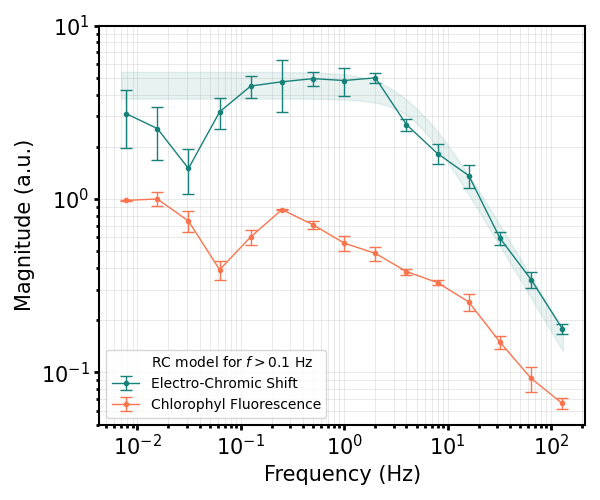

In [5]:
importlib.reload(tools)

marker = 3
format = '-o'

green = dc.colors.rgb.iloc[2]
orange = dc.colors.rgb.iloc[6]
start = 4

fig, ax = plt.subplots(figsize=(6,5))
#fig.suptitle("Comparioson of ECS and fluorescence", fontsize=14)
ax.errorbar(ECS.Frequency, ECS.Amplitude/(0.2*max(ECS.Amplitude)), fmt = format, markersize = marker, linewidth = 1, color = green, yerr=ECS.std_amp/(0.2*max(ECS.Amplitude)), capsize=4, label = "Electro-Chromic Shift")
ax = tools.plot_model(ax, "RC",ECS.Frequency[start:], ECS.Amplitude[start:]/(0.2*max(ECS.Amplitude)), sigma = ECS.std_amp[start:]/(0.2*max(ECS.Amplitude)), color = green, label = True, line = 0, alpha = 0.1)
#ax = tools.plot_model(ax, "RC",PSI.Frequency, PSI.Amplitude/max(PSI.Amplitude), sigma = PSI.std_amp/max(PSI.Amplitude), color = orange, label = False, line = 0, alpha = 0.1)
ax.errorbar(PSI.Frequency, PSI.Amplitude/max(PSI.Amplitude), fmt = format, markersize = marker, linewidth = 1, color = orange, yerr=PSI.std_amp/max(PSI.Amplitude), capsize=4, label = "Chlorophyl Fluorescence")

ax = tools.bode_plot_axes(ax)
ax.set_ylim(5e-2, 1e1)
legend = ax.legend()

legend.get_texts()[0].set_text('RC model for $f > 0.1$ Hz')

fig.tight_layout()
fig.savefig(f"{folder}/compare_ECS_FLUO.png", dpi=400)

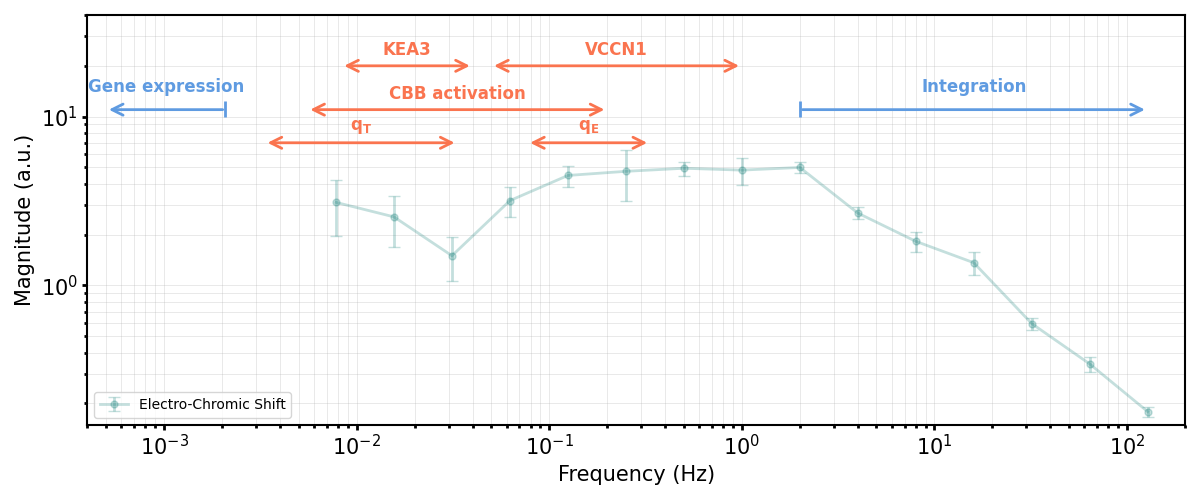

In [6]:
importlib.reload(tools)

marker = 5
format = '-o'

green = dc.colors.rgb.iloc[2]
orange = dc.colors.rgb.iloc[6]
blue = dc.colors.rgb.iloc[10]

fig, ax = plt.subplots(figsize=(12,5))
ax.errorbar(ECS.Frequency, ECS.Amplitude/(0.2*max(ECS.Amplitude)), fmt = format, markersize = marker, linewidth = 2,
            color = green, alpha = 0.25, yerr=ECS.std_amp/(0.2*max(ECS.Amplitude)), capsize=4, label = "Electro-Chromic Shift")

ax = tools.bode_plot_axes(ax)
ax.set_ylim(1.5e-1, 4e1)
ax.set_xlim(4e-4, 2e2)
ax.legend(loc = "lower left")


q_E = [3, 13] # seconds
q_T = [30, 5*60] # seconds  
CBB_act = [5, 3*60] # seconds
VCCN1 = [1, 20] # seconds
KEA3 = [25, 2*60] # seconds
integration = [0.0078125, 0.5] # seconds
gene_expression = [8*60, 2e3 ] # seconds

y= 7
ax.annotate('', xy=(1/q_E[0], y), xytext=(1/q_E[1], y), arrowprops=dict(arrowstyle='<->', mutation_scale=20, lw = 2, color = orange))
ax.text(np.sqrt((1/q_E[0]) * (1/q_E[1])), 1.1*y, r'$\mathbf{q_E}$', ha='center', va='bottom', color = orange, fontsize = 12, weight = 'bold')

y= 7
ax.annotate('', xy=(1/q_T[0], y), xytext=(1/q_T[1], y), arrowprops=dict(arrowstyle='<->', mutation_scale=20, lw = 2, color = orange))
ax.text(np.sqrt((1/q_T[0]) * (1/q_T[1])), 1.1*y, r'$\mathbf{q_T}$', ha='center', va='bottom', color = orange, fontsize = 12, weight = 'bold')

y= 11
ax.annotate('', xy=(1/CBB_act[0], y), xytext=(1/CBB_act[1], y), arrowprops=dict(arrowstyle='<->', mutation_scale=20, lw = 2, color = orange))
ax.text(np.sqrt((1/CBB_act[0]) * (1/CBB_act[1])), 1.1*y, 'CBB activation', ha='center', va='bottom', color = orange, fontsize = 12, weight = 'bold')



y = 20
ax.annotate('', xy = (1/VCCN1[0], y), xytext = (1/VCCN1[1], y), arrowprops=dict(arrowstyle='<->', mutation_scale=20, lw = 2, color = orange))
ax.text(np.sqrt((1/VCCN1[0]) * (1/VCCN1[1])), 1.1*y, 'VCCN1', ha='center', va='bottom', color = orange, fontsize = 12, weight = 'bold')
ax.annotate('', xy = (1/KEA3[0], y), xytext = (1/KEA3[1], y), arrowprops=dict(arrowstyle='<->', mutation_scale=20, lw = 2, color = orange))
ax.text(np.sqrt((1/KEA3[0]) * (1/KEA3[1])), 1.1*y, 'KEA3', ha='center', va='bottom', color = orange, fontsize = 12, weight = 'bold')


y = 11
ax.vlines(x=1/integration[1], ymin=0.9*y, ymax=1.12*y, color=blue, lw=2)
ax.annotate('', xy=(1/integration[0], y), xytext=(1/integration[1], y), arrowprops=dict(arrowstyle='->', mutation_scale=20, lw=2, color=blue))
ax.text(np.sqrt((1/integration[0]) * (1/integration[1])), 1.2*y, 'Integration', ha='center', va='bottom', color=blue, fontsize=12, weight='bold')

y = 11
ax.vlines(x=1/gene_expression[0], ymin=0.9*y, ymax=1.12*y, color=blue, lw=2)
ax.annotate('', xy=(1/gene_expression[0], y), xytext=(1/gene_expression[1], y), arrowprops=dict(arrowstyle='<-', mutation_scale=20, lw=2, color=blue))
ax.text(np.sqrt((1/gene_expression[0]) * (1/gene_expression[1])), 1.2*y, 'Gene expression', ha='center', va='bottom', color=blue, fontsize=12, weight='bold')


fig.tight_layout()
fig.savefig(f"{folder}/ECS_playing.png", dpi=400)

In [26]:
q_T

[300, 900]

In [6]:
fluo_phase_fund = PSI.Phases
fluo_phase_fund_std = PSI.std_phase

ECS_phase_fund = ECS.Phases
ECS_phase_fund_std = PSI.std_phase

NameError: name 'ECS_phase_fund' is not defined

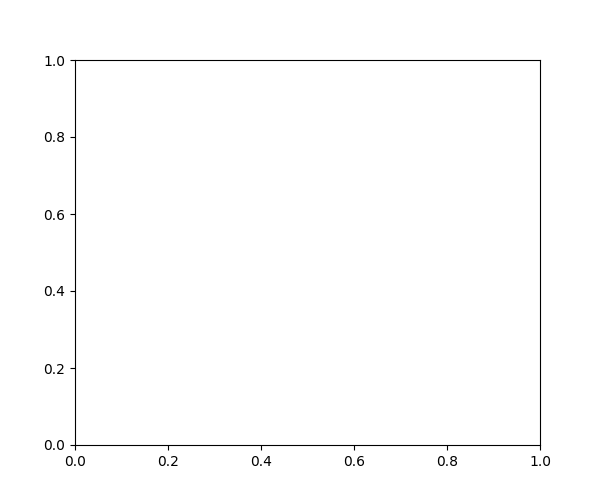

In [7]:
fig, ax = plt.subplots(figsize=(6,5))
ax.errorbar(ECS.Frequency, ECS_phase_fund/np.pi -1, fmt = format, markersize = marker, linewidth = 1, color = green, yerr=ECS_phase_fund_std/np.pi, capsize=4, label = "Electro-Chromic Shift")
ax.errorbar(PSI.Frequency, fluo_phase_fund/np.pi -1, fmt = format, markersize = marker, linewidth = 1, color = orange, yerr=fluo_phase_fund_std/np.pi, capsize=4, label = "Chlorophyl Fluorescence")

ax = tools.bode_plot_axes_phase(ax)
fig.tight_layout()
fig.savefig(f"{folder}/phase_fluo.png", dpi=400)

In [ ]:
ECS_phase_fund

0      -1.733619
1    -101.946055
2     -14.305301
3     -18.066125
4     -72.482461
5     -43.571732
6      -3.387122
7      -8.727247
8    -110.568919
9     -33.410983
10    -51.802786
11   -159.264071
12    -90.769891
13    -94.145033
14     43.013146
Name: Phases, dtype: float64

AttributeError: 'DataFrame' object has no attribute 'Std'

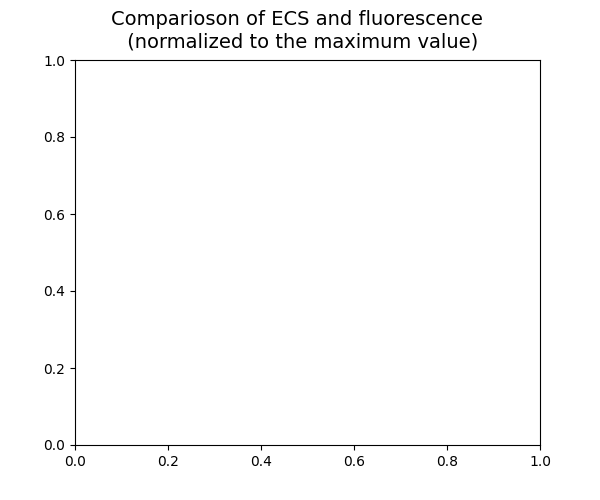

In [ ]:
marker = 2.5

fig, ax = plt.subplots(figsize=(6,5))
fig.suptitle("Comparioson of ECS and fluorescence \n (normalized to the maximum value)", fontsize=14)
ax.errorbar(ECS.Frequency, ECS.Amplitude/ECS.Amplitude.max(), fmt ='o', markersize = marker, linestyle = '-', linewidth = 1, yerr=ECS.Std/ECS.Amplitude.max(), capsize=4, label = "ECS")
ax.errorbar(PSI.Frequency, PSI.Amplitude/PSI.Amplitude.max(), fmt ='o', markersize = marker, linestyle = '-', linewidth = 1, yerr=PSI.Std/PSI.Amplitude.max(), capsize=4, label = "PSI")

ax = tools.bode_plot_axes(ax)
#ax.set_ylim(1e-1, 5e0)

fig.tight_layout()
fig.savefig(f"{folder}/compare_ECS_FLUO_norm.png", dpi=300)

AttributeError: 'DataFrame' object has no attribute 'Std'

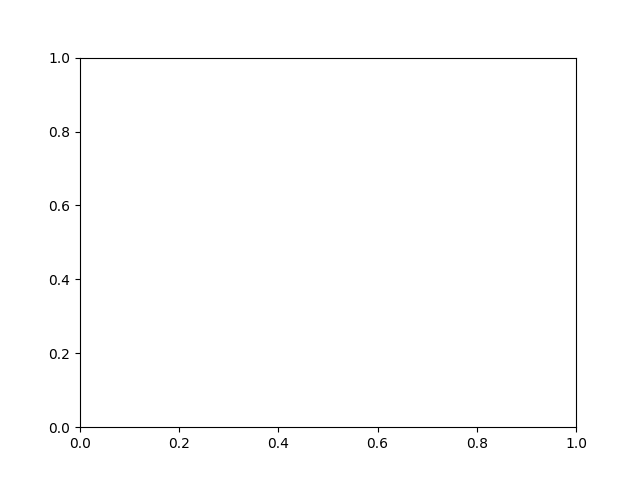

In [8]:
marker = 3
format = '-o'

green = dc.colors.rgb.iloc[2]
orange = dc.colors.rgb.iloc[6]

fig, ax = plt.subplots()
#fig.suptitle("Comparioson of ECS and fluorescence", fontsize=14)
ax.errorbar(ECS.Frequency, ECS.Amplitude, fmt = format, markersize = marker, linewidth = 1, color = green, yerr=ECS.Std, capsize=4, label = "Electro-Chromic Shift")
ax, popt = tools.plot_model(ax, "RC",ECS.Frequency, ECS.Amplitude, sigma = ECS.Std, color = green, label = True, line = 0, alpha = 0.1, Return_params = True)

err = ECS.Amplitude - mf.RC_transfer(ECS.Frequency, *popt)
ax2 = ax.twinx()
ax2.plot(ECS.Frequency, err, '-o', markersize = 5, linewidth = 1.5, color = orange, label = "Error")
ax = tools.bode_plot_axes(ax)
ax.set_ylim(1e0, 1.1e2)
#ax[1].set_yscale("log")
ax2.set_ylim(-30, 70)
ax2.set_xscale("log")
lims = ax.get_xlim()
ax2.hlines(0, 1e-3, 1e3, color = 'k', linestyle = '--', alpha = 0.5)
ax2.set_xlim(lims)
ax2.legend(loc = 'lower right', fontsize = 10)
ax2.set_ylabel("Error", fontsize = 16, rotation = 270)
ax2.tick_params(axis='y', labelsize=12)
fig.tight_layout()
fig.savefig(f"{folder}/compare_ECS_error.png", dpi=400)

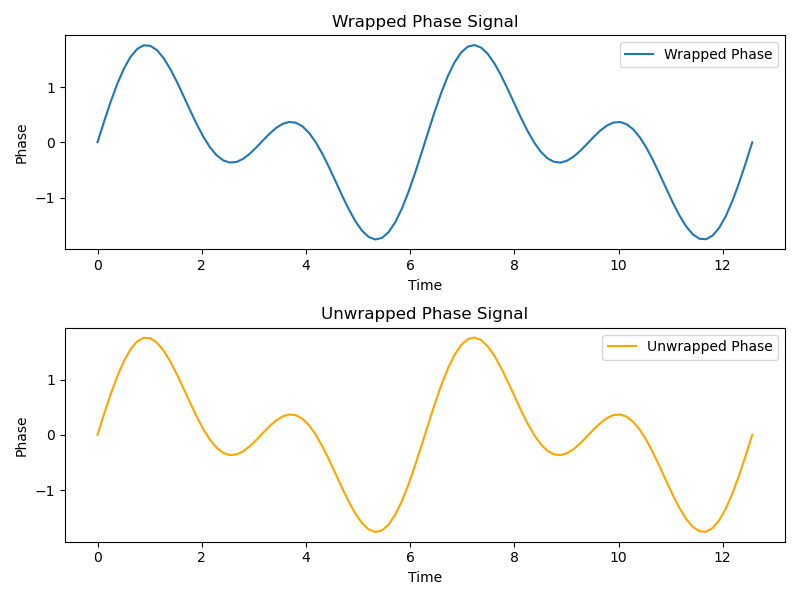

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a wrapped phase signal
t = np.linspace(0, 4*np.pi, 100)
wrapped_phase = np.sin(t) + np.sin(2*t)  # Wrapped phase signal

# Phase unwrapping function
def unwrap_phase(phase):
    unwrapped_phase = np.unwrap(phase)
    return unwrapped_phase

# Unwrap the phase
unwrapped_phase = unwrap_phase(wrapped_phase)

# Plotting the wrapped and unwrapped phases
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(t, wrapped_phase, label='Wrapped Phase')
plt.title('Wrapped Phase Signal')
plt.xlabel('Time')
plt.ylabel('Phase')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, unwrapped_phase, label='Unwrapped Phase', color='orange')
plt.title('Unwrapped Phase Signal')
plt.xlabel('Time')
plt.ylabel('Phase')
plt.legend()

plt.tight_layout()
plt.show()
